Задание 1 - Плотности логнормального распределения при разных параметрах M и q


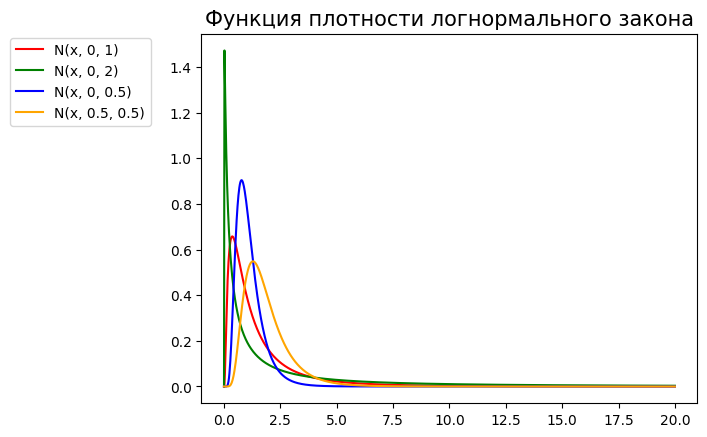

Задание 2 - Функция распределения логнормального закона M=10 q=2


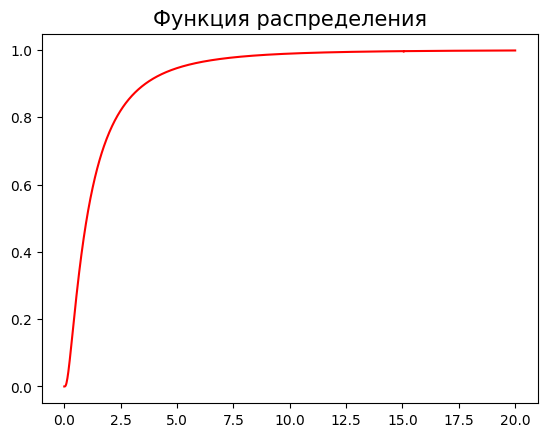

Задание 3 - Моделирование логнормального закона методом обратной функции


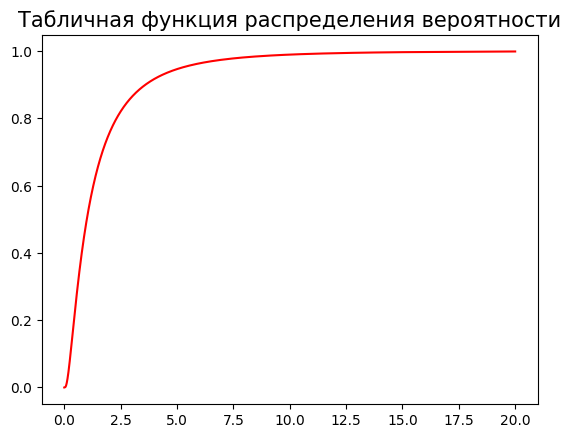

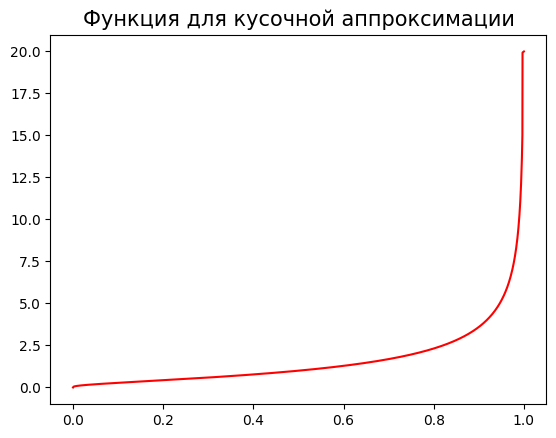

Задание 4 - Гистограммы относительных частот для последовательности случайных чисел при кол-ве экспериментов 10^2 10^3 10^4 10^5


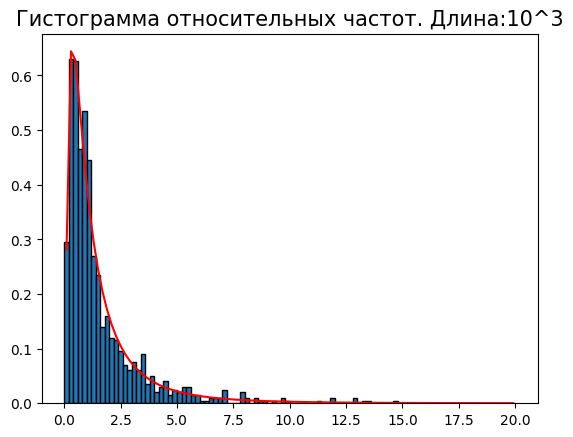

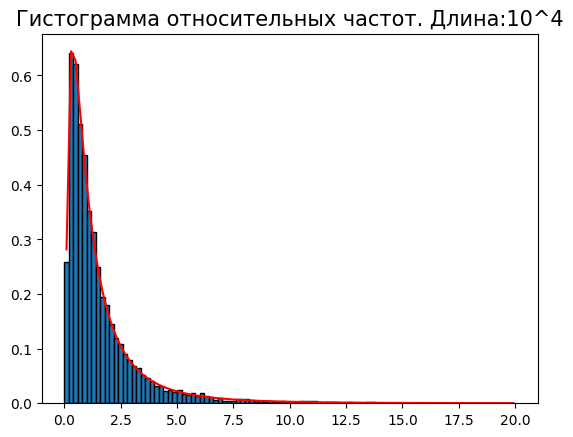

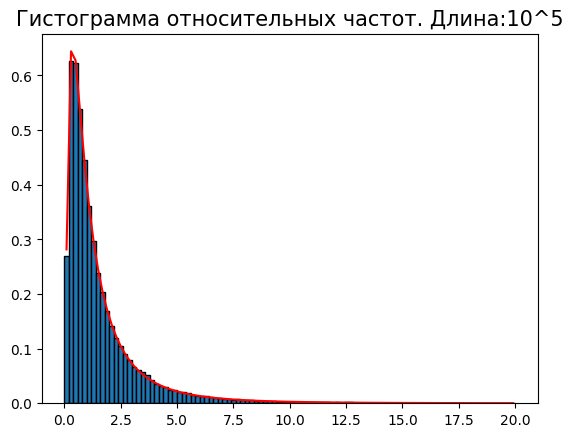

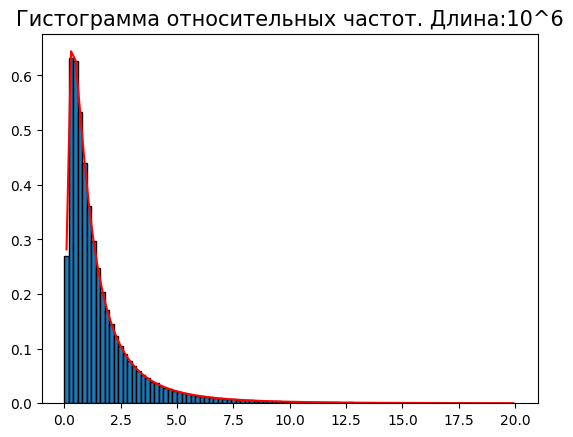

Задание 5 - График зависимости среднеквадратичной погрешности между ожидаемым и реальным распределением. Зависимость погрешности от числа экспериментов
Отклонения:
0.018266605982254394
0.017691051092102335
0.017668511601410763
0.017762207937473292


Text(0.5, 0, 'Длина последовательности (10^i)')

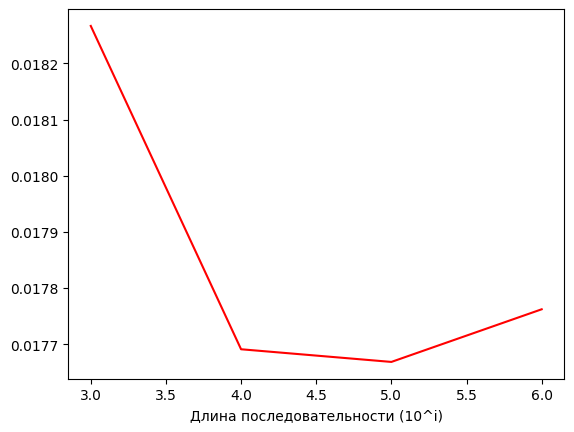

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

def N(x, m=0, sigma=1):
    if x > 0:
        return (1 / (x*sigma*math.sqrt(2*math.pi))) * math.exp( (-(math.log(x)-m)**2)/(2*sigma**2) )
    else:
        return 0

def func(x):
    integral, error = quad(N, -float('inf'), x)
    return integral

def getArg(f, minArg, maxArg, value, eps):
    minVal = f(minArg)
    maxVal = f(maxArg)

    while abs((maxArg-minArg)/maxArg)>eps:
        midArg = (minArg+maxArg)/2
        midVal = f(midArg)
        if midVal > value:
            maxArg = midArg
            maxVal = midVal
        else:
            minArg = midArg
            minVal = midVal
    return (minArg+maxArg)/2

def getTabF(f, minArg, maxArg, pointsCount):
    minVal = f(minArg)
    maxVal = f(maxArg)
    dVal = (maxVal-minVal)/(pointsCount-1)
    yTab = [minVal]
    xTab = [minArg]
    for i in range(1, pointsCount-2):
        yTab.append(minVal + dVal*i)
        xTab.append(getArg(f, minArg, maxArg, yTab[i], 10**(-15)))
    yTab.append(maxVal)
    xTab.append(maxArg)
    res = [xTab, yTab]
    return res

def model_N(xTab, yTab, p):
    y = 20 * p
    for i in range(1, len(xTab)-1):
        if yTab[i-1]<=p<=yTab[i]:
            y = ((p-yTab[i])/(yTab[i-1]-yTab[i]))*xTab[i-1]+((p-yTab[i-1])/(yTab[i]-yTab[i-1]))*xTab[i]
            break
    return y

def getFreqDistr(paramsArr, A, B, intervalsCount):
    dY = (B-A)/intervalsCount
    freq = []
    for i in range(0, intervalsCount):
        freq.append(0)
    for j in range(0, len(paramsArr)):
        Yc = paramsArr[j]
        fN = math.floor(Yc/dY)
        freq[fN] += 1
    for i in range(0, intervalsCount):
        freq[i] = freq[i]/(len(paramsArr)*dY)
    return freq

print("Задание 1 - Плотности логнормального распределения при разных параметрах M и q")


ms = [0, 0, 0, 0.5]
sigmas = [1, 2, 0.5, 0.5]

colors = ['r', 'g', 'b', 'orange']

for i in range(4):
    m = ms[i]
    sigma = sigmas[i]
    ys = []
    xs = np.linspace(0, 20, 1000)
    for x in xs:
        ys.append(N(x, m, sigma))
    plt.plot(xs, ys, label=f"N(x, {m}, {sigma})", color=colors[i])

plt.title(f"Функция плотности логнормального закона", fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(-0.4, 0.87))
plt.show()

print("Задание 2 - Функция распределения логнормального закона M=10 q=2")


xs = np.linspace(0, 20, 1000)
ys = []
for x in xs:
    ys.append(func(x))
plt.title(f"Функция распределения", fontsize=15)    
plt.plot(xs, ys, label=f"func(x)", color='r')
plt.show()

print("Задание 3 - Моделирование логнормального закона методом обратной функции")


min_v = 0
max_v = 20
tabSize = 1001
TAB_XY = getTabF(func, min_v, max_v, tabSize)
xTab, yTab = TAB_XY[0], TAB_XY[1]

plt.title(f"Табличная функция распределения вероятности", fontsize=15)
plt.plot(xTab, yTab, label=f"Tab", color='r')
plt.show()


ps = np.linspace(0, 1, 10000)
ys = []
for p in ps:
    ys.append(model_N(xTab, yTab, p))

plt.title(f"Функция для кусочной аппроксимации", fontsize=15)
plt.plot(ps, ys, label=f"Model_N(XTab, YTab, p)", color='r')
plt.show()

errors = []
print("Задание 4 - Гистограммы относительных частот для последовательности случайных чисел при кол-ве экспериментов 10^2 10^3 10^4 10^5")


for degree in range(3, 7):
    expNmb = 10**degree
    patArr_e3 = []
    for j in range(expNmb-1):
        patArr_e3.append(model_N(xTab, yTab, random.random()))
    # print(patArr_e3)
    # print(max(patArr_e3))
    # print(min(patArr_e3))

    A = min_v
    B = max_v
    K = 100
    resX = []
    
    for k in range(0, K):
        resX.append(((B-A)/K)*(0.5+k))
    resY = getFreqDistr(patArr_e3, A, B, K)
    resY[-1] = 0

    error = 0
    for i in range(0, K):
        error += ((N(resX[i], 10, 2)-resY[i])**2)/K
    errors.append(error)    

    # print(resX)
    # print(resY)


    ys = []
    for x in resX:
        ys.append(N(x))
    plt.plot(resX, ys, label=f"N(x, m, sigma)", color='r')
    plt.title(f"Гистограмма относительных частот. Длина:10^{degree}", fontsize=15)
    plt.bar(resX, resY, 0.2, edgecolor = 'black')
    plt.show()

print("Задание 5 - График зависимости среднеквадратичной погрешности между ожидаемым и реальным распределением. Зависимость погрешности от числа экспериментов")

print("Отклонения:")
for error in errors:
    print(error)
plt.plot([3, 4, 5, 6], errors, label=f"Зависимость среднеквадратического отклонения от длины последовательности", color='r')
plt.xlabel("Длина последовательности (10^i)")
